In [316]:
import pandas as pd
import re
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import math
import datetime

In [317]:
us_eq = pd.DataFrame.from_csv('earthquakes.csv',index_col=None)
ok_eq_and = pd.DataFrame.from_csv('ok_earthquakes_3.5plus.csv',index_col=None)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


In [318]:
us_eq.index= list(range(len(us_eq)))
ok_eq_and.index = list(range(len(ok_eq_and)))
us_eq.head()

magnitude                            label                       time  \
0        4.7   18km SE of Soda Springs, Idaho  2017-09-11 13:26:35 (UTC)   
1        4.7  12km ESE of Soda Springs, Idaho  2017-09-10 11:12:39 (UTC)   
2        5.0  18km ESE of Soda Springs, Idaho  2017-09-10 09:47:10 (UTC)   
3        4.6   16km SE of Soda Springs, Idaho  2017-09-06 04:37:44 (UTC)   
4        4.5  13km ESE of Soda Springs, Idaho  2017-09-04 06:17:09 (UTC)   

  depthinKM             longLat  
0    8.4 km  42.547°N 111.440°W  
1    4.6 km  42.607°N 111.470°W  
2    9.8 km  42.563°N 111.415°W  
3   10.0 km  42.572°N 111.444°W  
4    5.7 km  42.621°N 111.452°W

# <span style="color:blue"> **CLEAN DATA** </span>

### <span style="color:black"> **Use regex to make depth column numeric** </span>

In [319]:
#a = '-0.0 km'
regex = re.compile('[.]?([\d]{1,3}\.[\d]) km')
def stripNumber(s):
    return float(re.findall(regex,s)[0])

#stripNumber(a)
us_eq.depthinKM = list(map(stripNumber,map(str,us_eq.depthinKM)))

In [320]:
us_eq.head() #check to confirm depth is numeric

magnitude                            label                       time  \
0        4.7   18km SE of Soda Springs, Idaho  2017-09-11 13:26:35 (UTC)   
1        4.7  12km ESE of Soda Springs, Idaho  2017-09-10 11:12:39 (UTC)   
2        5.0  18km ESE of Soda Springs, Idaho  2017-09-10 09:47:10 (UTC)   
3        4.6   16km SE of Soda Springs, Idaho  2017-09-06 04:37:44 (UTC)   
4        4.5  13km ESE of Soda Springs, Idaho  2017-09-04 06:17:09 (UTC)   

   depthinKM             longLat  
0        8.4  42.547°N 111.440°W  
1        4.6  42.607°N 111.470°W  
2        9.8  42.563°N 111.415°W  
3       10.0  42.572°N 111.444°W  
4        5.7  42.621°N 111.452°W

### <span style="color:black"> **Magnitude and Frequency Relationship** </span>

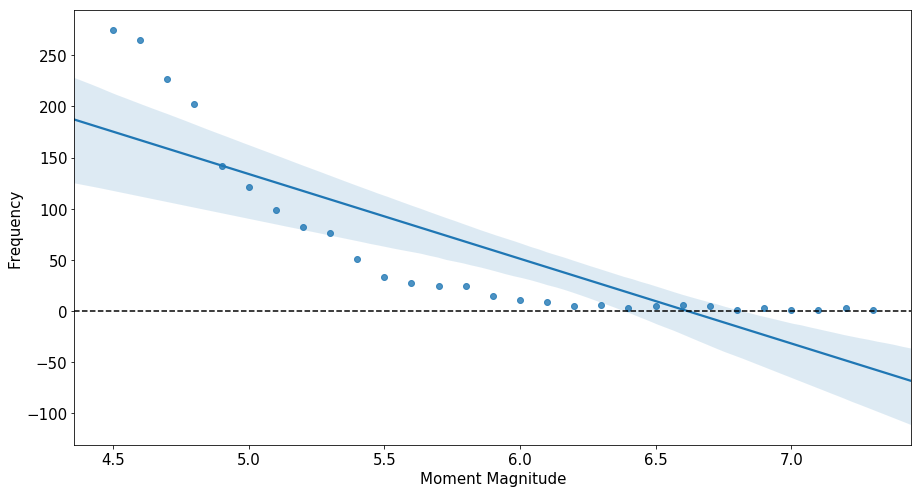

In [622]:
# use the function regplot to make a scatterplot
import seaborn as sns
magFreq = us_eq.groupby(['magnitude']).agg(['count'])
magFreq = magFreq.reset_index()
magFreq = magFreq[magFreq.columns[0:2]]
# magFreq['logFreq'] = magFreq.apply(log,(magFreq[magFreq.columns[1]]))
magFreq['logFreq'] = magFreq[magFreq.columns[1]].map(math.log)
magFreq.head()
               
# p = sns.regplot(x=magFreq.magnitude,y=magFreq[magFreq.columns[1]])
# a4_dims = (10.7, 8.27)
# fig, ax = plt.subplots(figsize=a4_dims)
plt.figure(figsize=(15,8))
g = sns.regplot(x=magFreq.magnitude,y=magFreq[magFreq.columns[1]])
rcParams.update({'font.size': 10})
#g.set(rc={'figure.figsize':(11.7,8.27)})
g.set(xlabel='Moment Magnitude', ylabel='Frequency')
#plt.grid(color='black', which='major', axis='y', linestyle='solid')
plt.axhline(0, color='black',linestyle='dashed')
#plt.ylim(0, 300)
plt.show()

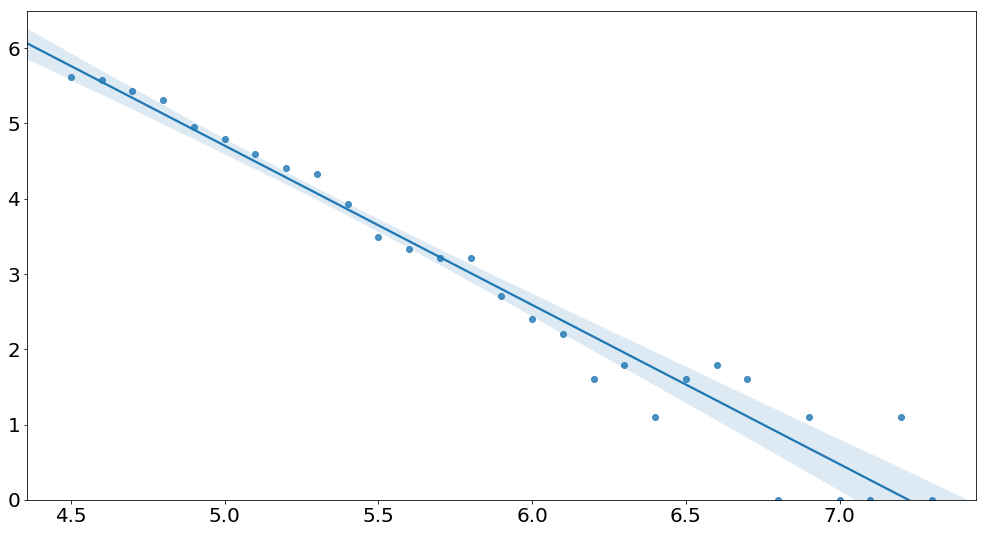

In [624]:
plt.figure(figsize=(17,9))
p = sns.regplot(x=magFreq.magnitude,y=magFreq.logFreq)
p.set(xlabel='', ylabel='')
rcParams.update({'font.size': 20})

plt.ylim(0, 6.5)
# sns.plt.xlim(0, None)

plt.show()

## <span style="color:orange"> **Tulsa Oklahoma Increaeses Time Series of Frequency** </span>

In [325]:
#print(us_eq.dtypes)

ok_eq_and['date'] = ok_eq_and['time']
# us_eq['date'] = data['time'].map(lambda x: x.lstrip('').rstrip(r' (UTC)'))
ok_eq_and['date'].replace(regex=True,inplace=True,to_replace=r'.UTC.',value=r'')

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S ')
ok_eq_and['date'] = list(map(dateparse, ok_eq_and['date']))
#, index_col='Month',date_parser=dateparse)
print(ok_eq_and.head())

   magnitude                            label                       time  \
0        3.8  21km ENE of Hennessey, Oklahoma  2017-12-29 04:45:00 (UTC)   
1        3.7      6km ESE of McLoud, Oklahoma  2017-12-28 20:11:14 (UTC)   
2        3.5    6km SSW of Langston, Oklahoma  2017-12-21 04:22:24 (UTC)   
3        3.5  21km ENE of Hennessey, Oklahoma  2017-12-20 06:00:02 (UTC)   
4        3.8  24km ENE of Mooreland, Oklahoma  2017-12-19 11:26:19 (UTC)   

  depthinKM                date  
0    5.6 km 2017-12-29 04:45:00  
1    5.1 km 2017-12-28 20:11:14  
2    7.2 km 2017-12-21 04:22:24  
3    5.0 km 2017-12-20 06:00:02  
4    5.0 km 2017-12-19 11:26:19  


In [326]:
regex = re.compile('Oklahoma')
regex = re.compile('.*,(..)')

def getState(s):
    if re.findall(regex,s)==['Oklahoma']:
        return(1)
    else:
        return(0)


ok_eq_and['IsOklahoma'] = list(map(str,(map(getState,ok_eq_and['label']))))

ok_eq_and.sort_values(by='IsOklahoma', ascending=False).head()

magnitude                            label                       time  \
0          3.8  21km ENE of Hennessey, Oklahoma  2017-12-29 04:45:00 (UTC)   
369        3.9     5km SE of Cherokee, Oklahoma  2014-12-30 21:24:51 (UTC)   
383        4.0    25km SSE of Medford, Oklahoma  2014-11-30 10:24:44 (UTC)   
382        3.7  17km ENE of Mooreland, Oklahoma  2014-12-03 13:33:33 (UTC)   
381        3.5    14km ESE of Medford, Oklahoma  2014-12-04 18:04:17 (UTC)   

    depthinKM                date IsOklahoma  
0      5.6 km 2017-12-29 04:45:00          1  
369    5.5 km 2014-12-30 21:24:51          1  
383    5.7 km 2014-11-30 10:24:44          1  
382    6.7 km 2014-12-03 13:33:33          1  
381    5.0 km 2014-12-04 18:04:17          1

In [406]:
ok_df = ok_eq_and[ok_eq_and['IsOklahoma']=='1']
ok_df.dtypes

def getYear(d):
    return(str(d.year))

ok_df['year'] = list(map(getYear,ok_df['date']))
ok_df2 = ok_df.groupby('year').agg(['count'])
ok_final = ok_df2.reset_index()
ok_final =ok_final[ok_final.columns[0:2]]
ok_final_over4 = ok_final[ok_final[ok_final.columns[1]]>2]
#list(ok_final.columns.values)
#ok_final.dtypes





/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


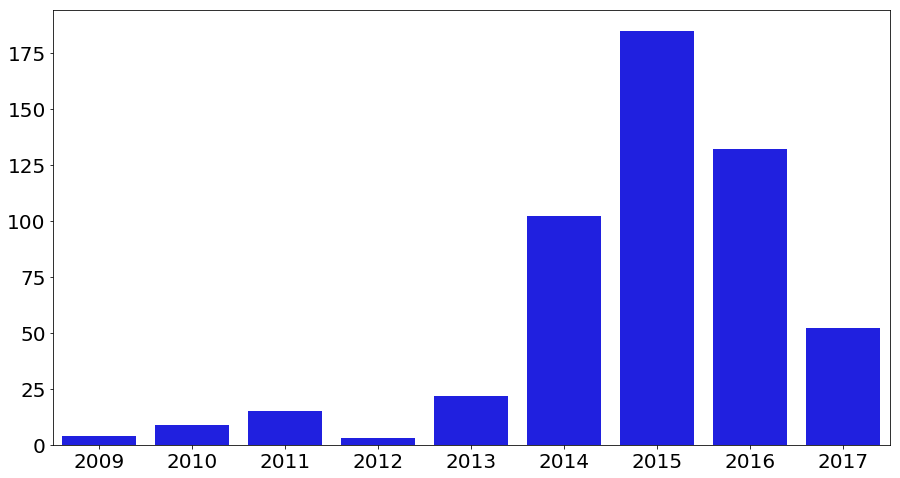

In [441]:
plt.figure(figsize=(15,8))
q = sns.barplot(x="year", y=('magnitude', 'count'), data=ok_final_over4, color='blue') #,palette = sns.light_palette("navy")
#q = sns.distplot(np.array(ok_final['year']))
#q.set(xlabel='Year', ylabel='Number of Earthquakes in Oklahoma over magnitude 3.5')
q.set(xlabel='', ylabel='')
rcParams.update({'font.size': 20})
#q.patch.set_facecolor('xkcd:green')
#q.set_facecolor('xkcd:grey')
#q.set_color('r')

In [412]:
ok_eq_and.sort_values(by='magnitude', ascending=False).head(10)

magnitude                          label                       time  \
540        5.8    14km NW of Pawnee, Oklahoma  2016-09-03 12:02:44 (UTC)   
562        5.7                       Oklahoma  2011-11-06 03:53:10 (UTC)   
543        5.1  31km NW of Fairview, Oklahoma  2016-02-13 17:07:06 (UTC)   
537        5.0     3km W of Cushing, Oklahoma  2016-11-07 01:44:24 (UTC)   
563        4.8                       Oklahoma  2011-11-05 07:12:45 (UTC)   
560        4.8                       Oklahoma  2011-11-08 02:46:57 (UTC)   
544        4.7  33km NW of Fairview, Oklahoma  2016-01-07 04:27:57 (UTC)   
547        4.7   26km E of Cherokee, Oklahoma  2015-11-30 09:49:12 (UTC)   
548        4.7  13km SW of Cherokee, Oklahoma  2015-11-19 07:42:12 (UTC)   
550        4.5  4km NNE of Crescent, Oklahoma  2015-07-27 18:12:15 (UTC)   

    depthinKM                date IsOklahoma  
540    5.6 km 2016-09-03 12:02:44          1  
562    5.2 km 2011-11-06 03:53:10          1  
543    8.3 km 2016-02-13 17:07:06          1  
537    4.4 km 2016-11-07 01:44:24          1  
563    3.1 km 2011-11-05 07:12:45          1  
560    5.0 km 2011-11-08 02:46:57          1  
544    4.1 km 2016-01-07 04:27:57          1  
547    5.6 km 2015-11-30 09:49:12          1  
548    5.9 km 2015-11-19 07:42:12          1  
550    5.0 km 2015-07-27 18:12:15          1

In [603]:
world_eq = pd.DataFrame.from_csv('earthquakesWorld.csv',index_col=None)
world_eq.columns

def isNotNa(x):
    return(pd.isna(x)==False)

world_eq = world_eq[list(map(isNotNa,world_eq['longLat']))]
world_eq.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


magnitude                                     label  \
0        6.5           1km E of Kampungbaru, Indonesia   
1        6.5  80km WNW of Bouvet Island, Bouvet Island   
2        6.3               45km NW of Fais, Micronesia   
3        6.4               50km NW of Fais, Micronesia   
4        6.1     18km NE of Bahia de Caraquez, Ecuador   

                        time depthinKM             longLat  \
0  2017-12-15 16:47:58 (UTC)   90.0 km   7.492°S 108.174°E   
1  2017-12-13 18:03:43 (UTC)   17.0 km    54.219°S 2.163°E   
2  2017-12-08 09:51:08 (UTC)    8.0 km  10.012°N 140.187°E   
3  2017-12-08 00:22:54 (UTC)   12.8 km  10.116°N 140.220°E   
4  2017-12-03 11:19:05 (UTC)   17.0 km    0.470°S 80.310°W   

              damageColor  
0  pager-alertlevel-green  
1  pager-alertlevel-green  
2  pager-alertlevel-green  
3  pager-alertlevel-green  
4  pager-alertlevel-green

In [604]:
world_eq.columns

#regex = re.compile('([0-9]*.[0-9]]*)°(.)')
def getLongLat(s):
    regex = re.compile('([0-9]*.[0-9]*)°(.)')
    return(re.findall(regex,s))

def signLongLat(t):
    if t[1] in ['N','E']:
        return(float(t[0]))
    else:
        return(-float(t[0]))
    
b =  list(map(getLongLat,world_eq['longLat']))
d = list(map(getLongLat,us_eq['longLat']))


world_eq['lat']= list(map(lambda L: signLongLat(L[0]),b))
world_eq['long']= list(map(lambda L: signLongLat(L[1]),b))

us_eq['lat']= list(map(lambda L: signLongLat(L[0]),d))
us_eq['long']= list(map(lambda L: signLongLat(L[1]),d))

#world_eq['long']

In [605]:
def getColor(s):
    regex = re.compile('pager-alertlevel-(.*)')
    return(re.findall(regex,s))
    
a = list(map(getColor,world_eq['damageColor']))
a = list(map(lambda s: s[0] if len(s)>0 else 'gray',a))
world_eq['damageColor'] = a
world_eq.head(20)

magnitude                                     label  \
0         6.5           1km E of Kampungbaru, Indonesia   
1         6.5  80km WNW of Bouvet Island, Bouvet Island   
2         6.3               45km NW of Fais, Micronesia   
3         6.4               50km NW of Fais, Micronesia   
4         6.1     18km NE of Bahia de Caraquez, Ecuador   
5         6.1                  55km NNE of Kerman, Iran   
6         6.5                Central Mid-Atlantic Ridge   
7         7.0         85km ENE of Tadine, New Caledonia   
8         6.6           74km E of Tadine, New Caledonia   
9         6.3           82km E of Tadine, New Caledonia   
10        6.4               64km ENE of Nyingchi, China   
11        6.5             18km W of Parrita, Costa Rica   
12        7.3                  29km S of Halabjah, Iraq   
13        6.5     67km WSW of Angoram, Papua New Guinea   
14        6.8                  93km NE of Hihifo, Tonga   
15        6.6          101km E of Tadine, New Caledonia   
16        6.7          131km E of Tadine, New Caledonia   
17        6.7             144km NNE of Palue, Indonesia   
18        6.7                      Bouvet Island region   
19        6.3                  46km SSW of Putre, Chile   

                         time depthinKM             longLat damageColor  \
0   2017-12-15 16:47:58 (UTC)   90.0 km   7.492°S 108.174°E       green   
1   2017-12-13 18:03:43 (UTC)   17.0 km    54.219°S 2.163°E       green   
2   2017-12-08 09:51:08 (UTC)    8.0 km  10.012°N 140.187°E       green   
3   2017-12-08 00:22:54 (UTC)   12.8 km  10.116°N 140.220°E       green   
4   2017-12-03 11:19:05 (UTC)   17.0 km    0.470°S 80.310°W       green   
5   2017-12-01 02:32:46 (UTC)    9.0 km   30.746°N 57.307°E       green   
6   2017-11-30 06:32:50 (UTC)   10.0 km    1.080°S 23.432°W       green   
7   2017-11-19 22:43:29 (UTC)   10.0 km  21.325°S 168.672°E       green   
8   2017-11-19 15:09:02 (UTC)   13.0 km  21.503°S 168.598°E       green   
9   2017-11-19 09:25:48 (UTC)   14.0 km  21.638°S 168.673°E       green   
10  2017-11-17 22:34:19 (UTC)    8.0 km   29.833°N 94.984°E       green   
11  2017-11-13 02:28:23 (UTC)   19.4 km    9.515°N 84.487°W      yellow   
12  2017-11-12 18:18:17 (UTC)   19.0 km   34.911°N 45.959°E         red   
13  2017-11-07 21:26:38 (UTC)  110.6 km   4.243°S 143.485°E       green   
14  2017-11-04 09:00:19 (UTC)   10.0 km  15.320°S 173.168°W       green   
15  2017-11-01 02:23:57 (UTC)   22.0 km  21.648°S 168.858°E       green   
16  2017-10-31 00:42:08 (UTC)   24.0 km  21.697°S 169.149°E       green   
17  2017-10-24 10:47:47 (UTC)  553.8 km   7.217°S 123.073°E       green   
18  2017-10-10 18:53:27 (UTC)    9.0 km    54.263°S 8.609°E       green   
19  2017-10-10 06:32:21 (UTC)   85.0 km   18.572°S 69.753°W       green   

       lat     long  
0   -7.492  108.174  
1  -54.219    2.163  
2   10.012  140.187  
3   10.116  140.220  
4   -0.470  -80.310  
5   30.746   57.307  
6   -1.080  -23.432  
7  -21.325  168.672  
8  -21.503  168.598  
9  -21.638  168.673  
10  29.833   94.984  
11   9.515  -84.487  
12  34.911   45.959  
13  -4.243  143.485  
14 -15.320 -173.168  
15 -21.648  168.858  
16 -21.697  169.149  
17  -7.217  123.073  
18 -54.263    8.609  
19 -18.572  -69.753

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


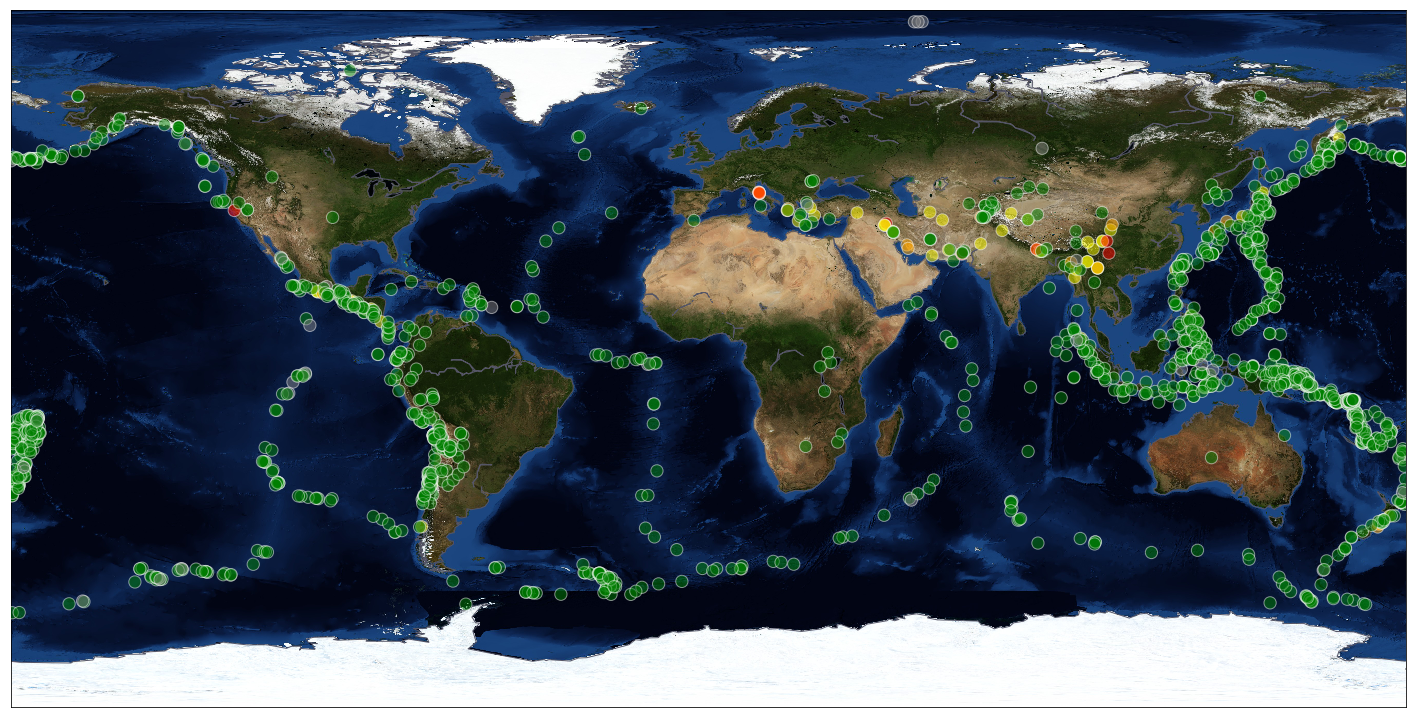

In [568]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

lat = world_eq['lat'].values
lon = world_eq['long'].values
#lons, lats = m(lon, lat)
color_damage = world_eq['damageColor'].values

plt.figure(figsize=(25, 13))
earth = Basemap()
earth.bluemarble()
earth.drawcoastlines(color='#555566', linewidth=1)

earth.scatter(lon, lat, color='white',alpha=.5, zorder=10, facecolor=color_damage,s=150)
plt.show()

In [592]:
print(max(us_eq['lat']))
print(min(us_eq['lat']))
print(max(us_eq['long']))
print(min(us_eq['long']))

49.96
24.606
-65.065
-124.994


/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


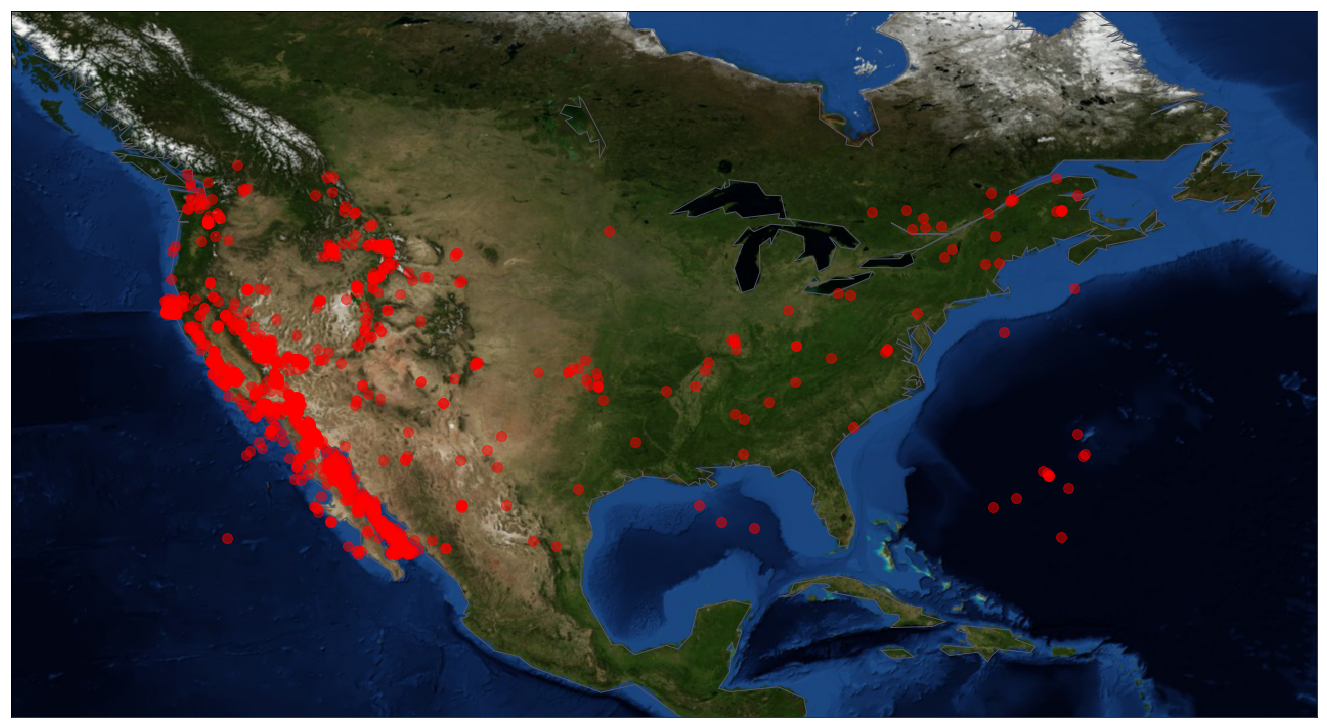

In [600]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

lat = us_eq['lat'].values
lon = us_eq['long'].values
#lons, lats = m(lon, lat)

plt.figure(figsize=(25, 13))
#us = Basemap(width=12000000,height=9000000,projection='lcc',
#            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
earth = Basemap(width=12000000,height=9000000,urcrnrlat=60,urcrnrlon=-50,llcrnrlat=14,llcrnrlon=-135.)
earth.bluemarble()
earth.drawcoastlines(color='#555566', linewidth=1)

earth.scatter(lon, lat, color='red',alpha=.5, zorder=10,s=100)
plt.show()

In [630]:
from math import sin, cos, sqrt, atan2, radians

40.7128, -74.0060

def distancePointsKm(lat1,long1,lat2,long2):
# approximate radius of earth in km
    R = 6371

    lat1 = radians(lat1)
    lon1 = radians(long1)
    lat2 = radians(lat2)
    lon2 = radians(long2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    distance = R*c
    
    return(distance)

distancePointsKm(37.7749,-122.4194,40.7128, -74.0060)# SF to NY # LA - 34.0522, -118.2437)




4129.08616505731

In [762]:
#Acorn Re 2018 - binary bond that defaults if an earthquake occurs with magnitude 5.5 or higher within 50 km of LA 
#or of magnitude 6.0 within 30 km of SF
circleRadiusLA = 100
MagThresholdSF = 6.5
MagThresholdLA = 6.5
circleRadiusSF = 100

dtLA_lat = 34.0522
dtLA_long = -118.2437
dtSF_lat = 37.7749
dtSF_long = -122.4194

L=[]
for i in range(len(us_eq)):
    L.append( distancePointsKm(dtLA_lat,dtLA_long,us_eq['lat'][i],us_eq['long'][i]))
us_eq['distanceFromLA_km']=L
us_eq.head()

magnitude                            label                       time  \
0        4.7   18km SE of Soda Springs, Idaho  2017-09-11 13:26:35 (UTC)   
1        4.7  12km ESE of Soda Springs, Idaho  2017-09-10 11:12:39 (UTC)   
2        5.0  18km ESE of Soda Springs, Idaho  2017-09-10 09:47:10 (UTC)   
3        4.6   16km SE of Soda Springs, Idaho  2017-09-06 04:37:44 (UTC)   
4        4.5  13km ESE of Soda Springs, Idaho  2017-09-04 06:17:09 (UTC)   

   depthinKM             longLat     lat     long  distanceFromLA_km  \
0        8.4  42.547°N 111.440°W  42.547 -111.440        1114.769644   
1        4.6  42.607°N 111.470°W  42.607 -111.470        1118.910578   
2        9.8  42.563°N 111.415°W  42.563 -111.415        1117.393887   
3       10.0  42.572°N 111.444°W  42.572 -111.444        1116.882334   
4        5.7  42.621°N 111.452°W  42.621 -111.452        1121.024978   

   distanceFromSF_km  Acorn_Default                date  year  
0        1072.104922              0 2017-09-11 13:26:35  2017  
1        1072.845593              0 2017-09-10 11:12:39  2017  
2        1074.725396              0 2017-09-10 09:47:10  2017  
3        1073.032161              0 2017-09-06 04:37:44  2017  
4        1074.857174              0 2017-09-04 06:17:09  2017

In [763]:
K=[]
for i in range(len(us_eq)):
    K.append(distancePointsKm(dtSF_lat,dtSF_long,us_eq['lat'][i],us_eq['long'][i]))
us_eq['distanceFromSF_km']=K
us_eq.head()

magnitude                            label                       time  \
0        4.7   18km SE of Soda Springs, Idaho  2017-09-11 13:26:35 (UTC)   
1        4.7  12km ESE of Soda Springs, Idaho  2017-09-10 11:12:39 (UTC)   
2        5.0  18km ESE of Soda Springs, Idaho  2017-09-10 09:47:10 (UTC)   
3        4.6   16km SE of Soda Springs, Idaho  2017-09-06 04:37:44 (UTC)   
4        4.5  13km ESE of Soda Springs, Idaho  2017-09-04 06:17:09 (UTC)   

   depthinKM             longLat     lat     long  distanceFromLA_km  \
0        8.4  42.547°N 111.440°W  42.547 -111.440        1114.769644   
1        4.6  42.607°N 111.470°W  42.607 -111.470        1118.910578   
2        9.8  42.563°N 111.415°W  42.563 -111.415        1117.393887   
3       10.0  42.572°N 111.444°W  42.572 -111.444        1116.882334   
4        5.7  42.621°N 111.452°W  42.621 -111.452        1121.024978   

   distanceFromSF_km  Acorn_Default                date  year  
0        1072.104922              0 2017-09-11 13:26:35  2017  
1        1072.845593              0 2017-09-10 11:12:39  2017  
2        1074.725396              0 2017-09-10 09:47:10  2017  
3        1073.032161              0 2017-09-06 04:37:44  2017  
4        1074.857174              0 2017-09-04 06:17:09  2017

In [764]:

depthKM =60

D=[]
for i in range(len(us_eq)):
    if (us_eq['depthinKM'][i]<=depthKM)&(us_eq['distanceFromSF_km'][i]<=circleRadiusSF)&(us_eq['magnitude'][i] >= MagThresholdSF):
        D.append(1)
    else:
        if (us_eq['depthinKM'][i]<=depthKM)&(us_eq['distanceFromLA_km'][i]<=circleRadiusLA)&(us_eq['magnitude'][i] >= MagThresholdLA):
            D.append(1)
        else:
            D.append(0)
            
us_eq['Acorn_Default']= D
        
us_eq.head()


magnitude                            label                       time  \
0        4.7   18km SE of Soda Springs, Idaho  2017-09-11 13:26:35 (UTC)   
1        4.7  12km ESE of Soda Springs, Idaho  2017-09-10 11:12:39 (UTC)   
2        5.0  18km ESE of Soda Springs, Idaho  2017-09-10 09:47:10 (UTC)   
3        4.6   16km SE of Soda Springs, Idaho  2017-09-06 04:37:44 (UTC)   
4        4.5  13km ESE of Soda Springs, Idaho  2017-09-04 06:17:09 (UTC)   

   depthinKM             longLat     lat     long  distanceFromLA_km  \
0        8.4  42.547°N 111.440°W  42.547 -111.440        1114.769644   
1        4.6  42.607°N 111.470°W  42.607 -111.470        1118.910578   
2        9.8  42.563°N 111.415°W  42.563 -111.415        1117.393887   
3       10.0  42.572°N 111.444°W  42.572 -111.444        1116.882334   
4        5.7  42.621°N 111.452°W  42.621 -111.452        1121.024978   

   distanceFromSF_km  Acorn_Default                date  year  
0        1072.104922              0 2017-09-11 13:26:35  2017  
1        1072.845593              0 2017-09-10 11:12:39  2017  
2        1074.725396              0 2017-09-10 09:47:10  2017  
3        1073.032161              0 2017-09-06 04:37:44  2017  
4        1074.857174              0 2017-09-04 06:17:09  2017

In [784]:
us_eq.sort_values(by=['Acorn_Default'], ascending =False)

1710,1705
#us_eq[us_eq['label']=='1km W of Day Valley, California']
us_eq.columns = ['Magnitude','Earthquake_Name','Time','Depth_KM','LongLat_String','Latitude','Longitude','DistanceFromLA_KM','DistanceFromSF_KM','Acorn_Default','date1','year1']
us_eq.sort_values(by=['Magnitude'], ascending=False)          

Magnitude                           Earthquake_Name  \
1705        7.3            Landers, California Earthquake   
1717        7.2              offshore Northern California   
1628        7.2                12km SW of Delta, B.C., MX   
1708        7.2          20km SSW of Rio Dell, California   
1700        7.1                     16km SW of Ludlow, CA   
1595        7.0                   Baja California, Mexico   
1710        6.9           1km W of Day Valley, California   
1634        6.9                            Sonora, Mexico   
1715        6.9                            southern Idaho   
1697        6.8            Puget Sound region, Washington   
1609        6.7                        Gulf of California   
1703        6.7                     1km NNW of Reseda, CA   
1711        6.7                        Gulf of California   
1716        6.7                        Central California   
1564        6.7            95km SW of Topolobampo, Mexico   
1725        6.6                10km SSW of Agua Dulce, CA   
1661        6.6                        Gulf of California   
1702        6.6                        Gulf of California   
1712        6.6                 22km W of Westmorland, CA   
1579        6.6              99km SW of Etchoropo, Mexico   
1706        6.6              offshore Northern California   
1680        6.5                        Central California   
1724        6.5                        Gulf of California   
1722        6.5                   Baja California, Mexico   
1630        6.5              offshore Northern California   
1707        6.5              offshore Northern California   
1714        6.4                        Central California   
1682        6.4                        Gulf of California   
1720        6.4              10km E of Mexicali, B.C., MX   
1723        6.3                        Gulf of California   
...         ...                                       ...   
705         4.5                                Washington   
380         4.5                              Pennsylvania   
383         4.5                       Northern California   
1008        4.5          offshore Baja California, Mexico   
1010        4.5                           Sinaloa, Mexico   
1014        4.5                                      Utah   
346         4.5                    22km SSW of Ludlow, CA   
985         4.5                                    Nevada   
1395        4.5                        Central California   
343         4.5                            Sonora, Mexico   
736         4.5                        Gulf of California   
1434        4.5  Nuclear Explosion 57km ENE of Beatty, NV   
1432        4.5          offshore Baja California, Mexico   
320         4.5                        Gulf of California   
322         4.5                    14km WNW of Ludlow, CA   
324         4.5                    7km NE of Imperial, CA   
325         4.5              offshore Northern California   
1422        4.5                                   Alabama   
728         4.5                                      Utah   
1413        4.5                                    Nevada   
1410        4.5        Yellowstone National Park, Wyoming   
1409        4.5        Yellowstone National Park, Wyoming   
725         4.5         8km E of Mount Sterling, Kentucky   
336         4.5             27km NW of Ludlow, California   
724         4.5                                    Nevada   
339         4.5                      18km W of Ludlow, CA   
722         4.5                                    Nevada   
1400        4.5            0km WSW of Palermo, California   
340         4.5                    11km WSW of Ludlow, CA   
327         4.5    11km SW of Estacion Coahuila, B.C., MX   

                           Time  Depth_KM      LongLat_String  Latitude  \
1705  1992-06-28 11:57:34 (UTC)       0.1  34.200°N 116.437°W    34.200   
1717  1980-11-08 10:27:34 (UTC)      19.0  41.117°N 124.253°W    41.117  

In [770]:
us_eq['date'] = us_eq['time']

us_eq['date'].replace(regex=True,inplace=True,to_replace=r'.UTC.',value=r'')

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S ')
us_eq['date'] = list(map(dateparse, us_eq['date']))
#, index_col='Month',date_parser=dateparse)
def getYear(d):
    return(str(d.year))

def sumCapOne(x):
    return(min(sum(x),1))
    
us_eq['year'] = list(map(getYear,us_eq['date']))
acorn = us_eq.groupby('year')['Acorn_Default'].apply(sumCapOne)
acorn = acorn.reset_index()
#acorn = acorn[acorn.columns[0,1,5]]
acorn.reset_index
sum(acorn['Acorn_Default'])/(48)



0.0625

In [772]:
acorn['Acorn_Default'].sum()/len(acorn)

0.0625

In [773]:
acorn.columns =['Year', 'Acorn_Default?']

In [774]:
acorn[acorn['Acorn_Default?']==1]

Year  Acorn_Default?
1   1971               1
19  1989               1
24  1994               1

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


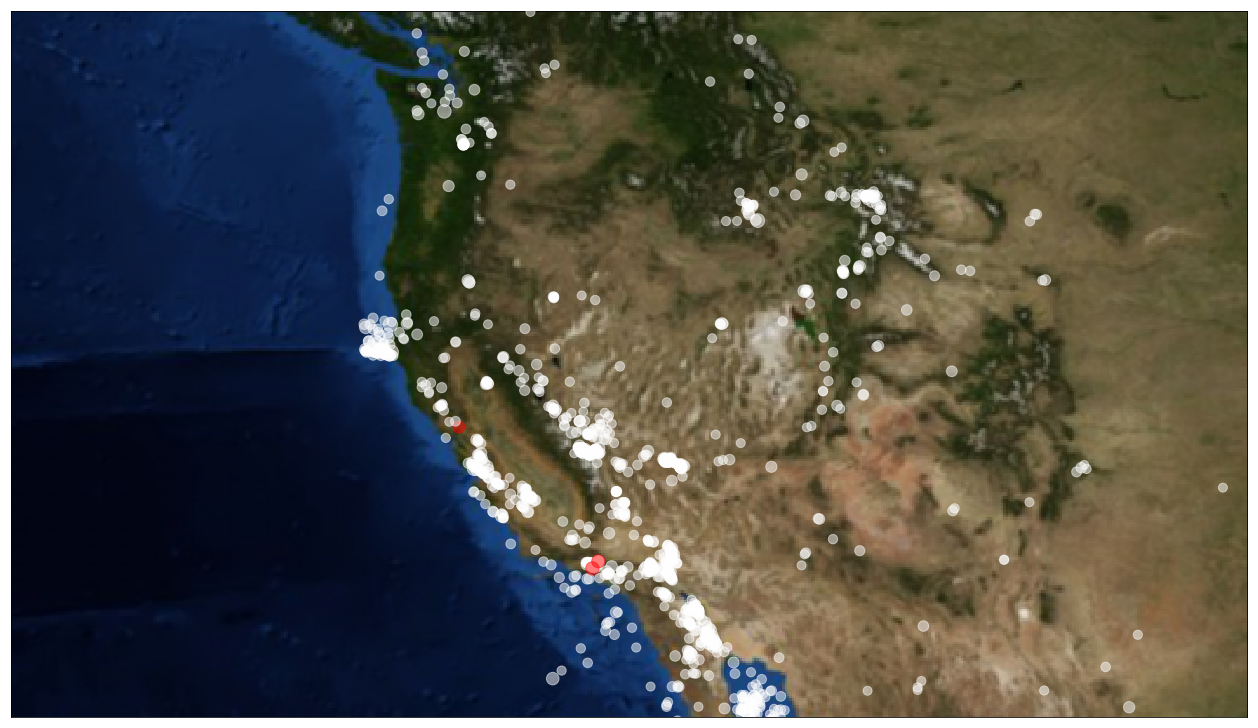

In [755]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

lat = us_eq['lat'].values
lon = us_eq['long'].values
color = us_eq['Acorn_Default'].values

def tran(x):
    return((2*x)**2)
size = list(map(tran,us_eq['magnitude']))

C=[]
S=[]
for i in range(len(us_eq)):
    C.append('red' if us_eq['Acorn_Default'][i] == 1 else 'white')


plt.figure(figsize=(25, 13))
#us = Basemap(width=12000000,height=9000000,projection='lcc',
#            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
# earth = Basemap(projection='lcc', resolution='h', 
#             lat_0=37.5, lon_0=-119,
#             width=1E6, height=1.2E6)


earth = Basemap(resolution='h',urcrnrlat=50,urcrnrlon=-100,llcrnrlat=30,llcrnrlon=-135)
earth.bluemarble()
#earth.drawcoastlines(color='#555566', linewidth=1)

earth.scatter(lon, lat, color=C,alpha=.5, zorder=10,s=size)
plt.show()